In [57]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import pathlib

## split and copy paste data

copy paste files into os.path.join(asset_path, 'train_data_samples') and os.path.join(asset_path, 'test_data_samples')


# Split the dataset in data samples

(scripts/generated_data_samples.py)

## Get data path


In [58]:
notebook_path = os.path.abspath("Notebook_MNIST.ipynb")
root_path = os.path.dirname(notebook_path)
data_path = os.path.join(root_path, 'data')
data_dir = pathlib.Path(data_path)
print(data_path)


/home/fabien/python-projects/substra/substra/examples/mnist/data


In [59]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
print(CLASS_NAMES)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [53]:
#useful methods from https://www.tensorflow.org/tutorials/load_data/images

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return img

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

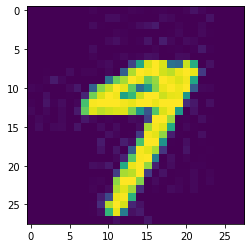

In [54]:
# number of data samples for the train and test sets
N_TRAIN_DATA_SAMPLES = 10
N_TEST_DATA_SAMPLES = 2
import time
src_files = os.listdir(data_path)
asset_path = os.path.join(root_path, '/assets')

for folder in src_files :
    folder_path = os.path.join(data_path,folder)
    files = os.listdir(folder_path)
    for data_file in files :
        data_file_path=os.path.join(folder_path,data_file)
        img=mpimg.imread(data_file_path)
        #print(data_file)
        plt.imshow(img)


In [55]:

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

for f in list_ds.take(5):
  print(f.numpy())
 

b'/home/fabien/python-projects/substra/substra/examples/mnist/data/7/img_120.jpg'
b'/home/fabien/python-projects/substra/substra/examples/mnist/data/4/img_3.jpg'
b'/home/fabien/python-projects/substra/substra/examples/mnist/data/2/img_370.jpg'
b'/home/fabien/python-projects/substra/substra/examples/mnist/data/5/img_244.jpg'
b'/home/fabien/python-projects/substra/substra/examples/mnist/data/7/img_102.jpg'


In [56]:
 
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (28, 28, 3)
Label:  [False False  True False False False False False False False]
